# Remaining-useful-life-prediction-of-turbofan-engine

Prognostics and health management is an important topic in industry for predicting state of assets to avoid downtime and failures. This data set is the Kaggle version of the very well known public data set for asset degradation modeling from NASA. It includes Run-to-Failure simulated data from turbo fan jet engines.

Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.

### Prediction Goal

In this dataset the goal is to predict the remaining useful life (RUL) of each engine in the test dataset. RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

In [1]:
!pip install numpy pandas matplotlib seaborn plotly sklearn opendatasets --quiet

In [ ]:
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
train = pd.read_csv(('train_FD001.txt'), sep=' ', header=None)

In [160]:
test = pd.read_csv(('test_FD001.txt'), sep=' ', header=None)

In [124]:
RUL = pd.read_csv(('RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [89]:
train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [90]:
test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [91]:
RUL

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [125]:
def get_column_names(data):
  data.drop(columns=[26,27],inplace=True)
  columns = ["Section-{}".format(i)  for i in range(26)]
  data.columns = columns
  return data

In [126]:
train = get_column_names(train)

In [161]:
test = get_column_names(test)

In [95]:
train

,Section-0,Section-1,Section-2,Section-3,Section-4,Section-5,Section-6,Section-7,Section-8,Section-9,...,Section-16,Section-17,Section-18,Section-19,Section-20,Section-21,Section-22,Section-23,Section-24,Section-25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [96]:
train.describe()

,Section-0,Section-1,Section-2,Section-3,Section-4,Section-5,Section-6,Section-7,Section-8,Section-9,...,Section-16,Section-17,Section-18,Section-19,Section-20,Section-21,Section-22,Section-23,Section-24,Section-25
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [128]:
# Names 
MachineID_name = ["Section-0"]
RUL_name = ["Section-1"]
OS_name = ["Section-{}".format(i) for i in range(2,5)]
Sensor_name = ["Section-{}".format(i) for i in range(5,26)]

In [129]:
# Data in pandas DataFrame
MachineID_data = train[MachineID_name]
RUL_data = train[RUL_name]
OS_data = train[OS_name]
Sensor_data = train[Sensor_name]
'''
# Test
MachineID_data = test[MachineID_name]
RUL_data = test[RUL_name]
OS_data = test[OS_name]
Sensor_data = test[Sensor_name]
'''

'\n# Test\nMachineID_data = test[MachineID_name]\nRUL_data = test[RUL_name]\nOS_data = test[OS_name]\nSensor_data = test[Sensor_name]\n'

In [130]:
# Data in pandas Series
MachineID_series = train["Section-0"]
RUL_series = train["Section-1"]

In [131]:
grp = RUL_data.groupby(MachineID_series)
max_cycles = np.array([max(grp.get_group(i)["Section-1"]) for i in MachineID_series.unique()])

In [132]:
print("Max Life  = ",max(max_cycles))
print("Mean Life = ",np.mean(max_cycles))
print("Min Life  = ",min(max_cycles))

Max Life  =  362
Mean Life =  206.31
Min Life  =  128


In [133]:
train.drop(columns=["Section-0","Section-4", "Section-5", "Section-9", "Section-10",  "Section-14","Section-20","Section-22", "Section-23"] , inplace=True)

In [104]:
train

,Section-1,Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## Scale the data

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [134]:
train = scaler.fit_transform(train)
#test = scaler.transform(test)

In [135]:
train = pd.DataFrame(train)
train = np.nan_to_num(train)

In [109]:
train

array([[0.        , 0.45977011, 0.16666667, ..., 0.33333333, 0.71317829,
        0.7246617 ],
       [0.00277008, 0.6091954 , 0.25      , ..., 0.33333333, 0.66666667,
        0.73101353],
       [0.00554017, 0.25287356, 0.75      , ..., 0.16666667, 0.62790698,
        0.62137531],
       ...,
       [0.54570637, 0.52298851, 0.5       , ..., 0.83333333, 0.23255814,
        0.05399061],
       [0.54847645, 0.43678161, 0.75      , ..., 0.58333333, 0.11627907,
        0.23446562],
       [0.55124654, 0.31609195, 0.08333333, ..., 0.66666667, 0.17829457,
        0.21817178]])

In [136]:
def RUL_df():
    rul_lst = [j  for i in MachineID_series.unique() for j in np.array(grp.get_group(i)[::-1]["Section-1"])]
    rul_col = pd.DataFrame({"rul":rul_lst})
    return rul_col

In [137]:
X_train = np.array(train)
y_train = np.array(RUL_df()).reshape(-1,1)

In [138]:
print(X_train.shape,y_train.shape)

(20631, 17) (20631, 1)


## Train LSTM model

In [40]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 14 kB/s 
     |████████████████████████████████| 1.7 MB 36.0 MB/s 
     |████████████████████████████████| 6.0 MB 71.5 MB/s 
     |████████████████████████████████| 439 kB 72.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [41]:
from keras.layers import TimeDistributed, Flatten
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import LSTM

In [139]:
def create_dataset(X, AR=5):
    data = []
    for i in range(len(X)-AR-1):
        data.append(X[i:(i+AR)])
    return np.array(data)

In [140]:
X_train = create_dataset(X_train)

In [144]:
y_train = y_train[6:]

In [145]:
X_train.shape, y_train.shape

((20625, 5, 17), (20625, 1))

In [146]:
def predict_model(layers):
        #d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        #model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=True))
        #model.add(Dropout(d))
        model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
        model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
        model.compile(loss='mean_squared_error',optimizer='adam')
        return model

In [147]:
model = predict_model([17,5])

In [148]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 128)            74752     
                                                                 
 lstm_7 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dense_6 (Dense)             (None, 5, 16)             1040      
                                                                 
 dense_7 (Dense)             (None, 5, 1)              17        
                                                                 
Total params: 125,217
Trainable params: 125,217
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
history = model.fit(X_train,y_train,
                    batch_size=512,
                    epochs=50,
                    validation_split=0.15,
                    verbose=1)

Epoch 1/50
35/35 [==============================] - 10s 142ms/step - loss: 16023.4863 - val_loss: 19286.5176
Epoch 2/50
35/35 [==============================] - 3s 96ms/step - loss: 15603.3555 - val_loss: 18515.1719
Epoch 3/50
35/35 [==============================] - 3s 85ms/step - loss: 14618.2188 - val_loss: 17160.4609
Epoch 4/50
35/35 [==============================] - 3s 83ms/step - loss: 13176.5391 - val_loss: 15402.8135
Epoch 5/50
35/35 [==============================] - 3s 77ms/step - loss: 11452.0273 - val_loss: 13434.4424
Epoch 6/50
35/35 [==============================] - 3s 77ms/step - loss: 9661.4697 - val_loss: 11484.2607
Epoch 7/50
35/35 [==============================] - 3s 81ms/step - loss: 8010.9126 - val_loss: 9770.1738
Epoch 8/50
35/35 [==============================] - 3s 86ms/step - loss: 6666.6250 - val_loss: 8423.2471
Epoch 9/50
35/35 [==============================] - 3s 89ms/step - loss: 5707.5103 - val_loss: 7481.0586
Epoch 10/50
35/35 [=======================

In [162]:
RUL_name = ["Section-1"]
RUL_data = test[RUL_name]
MachineID_series = test["Section-0"]
grp = RUL_data.groupby(MachineID_series)
max_cycles = np.array([max(grp.get_group(i)["Section-1"]) for i in MachineID_series.unique()])
max_cycles[0] = max_cycles[0] - 6

In [163]:
test.drop(test[["Section-0", "Section-4", "Section-5",  "Section-9", "Section-10",  "Section-14", "Section-20", "Section-22","Section-23"]], axis=1 , inplace=True)

In [164]:
test = scaler.transform(test)
test = pd.DataFrame(test)
test = np.nan_to_num(test)

In [165]:
test

array([[0.        , 0.63218391, 0.75      , ..., 0.33333333, 0.55813953,
        0.66183375],
       [0.00277008, 0.34482759, 0.25      , ..., 0.41666667, 0.68217054,
        0.68682684],
       [0.00554017, 0.51724138, 0.58333333, ..., 0.41666667, 0.72868217,
        0.72134769],
       ...,
       [0.5401662 , 0.46551724, 0.25      , ..., 0.58333333, 0.37209302,
        0.4293013 ],
       [0.54293629, 0.2816092 , 0.58333333, ..., 0.58333333, 0.40310078,
        0.51877934],
       [0.54570637, 0.57471264, 0.75      , ..., 0.66666667, 0.43410853,
        0.40223695]])

In [166]:
X_test = np.array(test)
y_test = np.array(RUL)

In [167]:
print(X_test.shape,y_test.shape)
print(max_cycles)

(13096, 17) (100, 1)
[ 25  49 126 106  98 105 160 166  55 192  83 217 195  46  76 113 165 133
 135 184 148  39 130 186  48  76 140 158 171 143 196 145  50 203 198 126
 121 125  37 133 123 156 172  54 152 146  73  78 303  74 144 189 164 121
 113 136 160 176  94 147 159 232 155 168  71 147  71 187  54 152  68 131
 112 137  88 205 162  72 101 133 213 162  73 172  34 110  56  68 177 146
 234 150 244 133  89  97 134 121  97 198]


In [168]:
def create_dataset(X, look_back=5):
    data = []
    for i in range(len(X)-look_back-1):
        data.append(X[i:(i+look_back)])
    return np.array(data)
X_test = create_dataset(X_test)

In [169]:
print(X_test.shape,y_test.shape)

(13090, 5, 17) (100, 1)


In [170]:
pred_test = model.predict(X_test)

410/410 [==============================] - 4s 7ms/step


In [176]:
final_pred = []
count = 0
for i in range(100):
    temp = 0
    j = max_cycles[i] 
    while j>0:
        temp = temp + pred_test[count][-1]
        j=j-1
        count=count+1
    final_pred.append(int(temp/max_cycles[i]))

In [180]:
print(final_pred)

[162, 99, 60, 85, 83, 80, 110, 79, 76, 101, 35, 115, 100, 32, 145, 139, 65, 91, 133, 80, 121, 105, 161, 55, 150, 131, 132, 82, 109, 57, 74, 45, 48, 68, 49, 33, 120, 31, 176, 39, 112, 112, 95, 128, 71, 79, 36, 115, 103, 137, 96, 97, 96, 112, 124, 35, 77, 99, 148, 91, 76, 109, 71, 90, 60, 66, 137, 89, 116, 89, 115, 102, 155, 86, 129, 93, 97, 67, 117, 91, 81, 84, 128, 84, 69, 94, 155, 56, 68, 81, 34, 31, 45, 68, 142, 106, 96, 93, 84, 87]


In [191]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [186]:
print("mean_squared_error >> ", mean_squared_error(y_test,final_pred))
print("root_mean_squared_error >> ", math.sqrt(mean_squared_error(y_test,final_pred)))
print("mean_absolute_error >>",mean_absolute_error(y_test,final_pred))

mean_squared_error >>  2173.12
root_mean_squared_error >>  46.61673519241776
mean_absolute_error >> 38.06


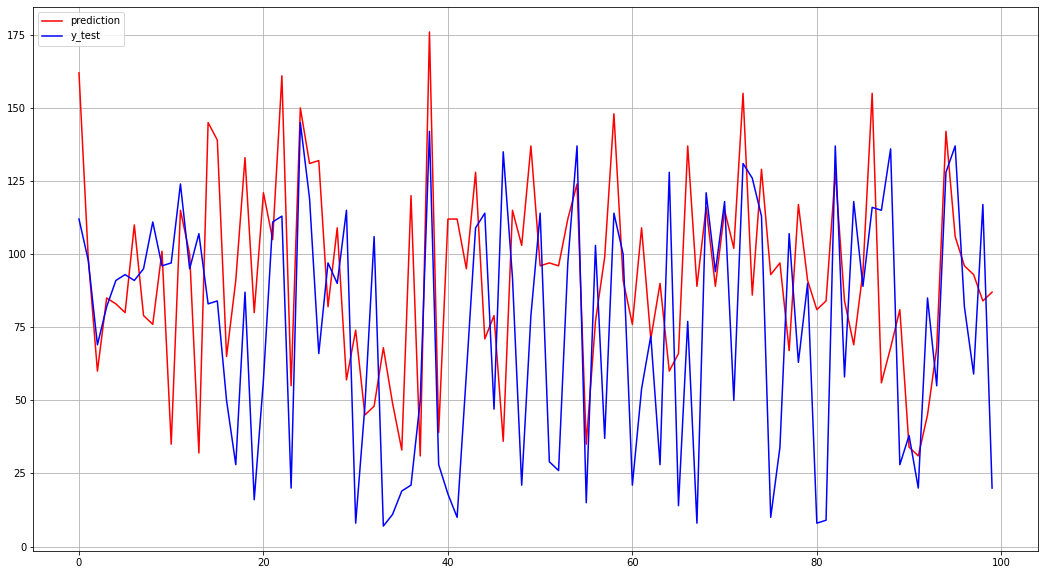

In [181]:
fig = plt.figure(figsize=(18,10))
plt.plot(final_pred,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Training Linear regression model

In [36]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model_sgdr = SGDRegressor().fit(X_train, y_train)

In [ ]:
sgdr_train_pred = model_sgdr.predict(X_train)
sgdr_test_pred = model_sgdr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("Train R2 value = ",r2_score(y_train,sgdr_train_pred))
print("Test R2 value  = ",r2_score(y_test,sgdr_test_pred))

Train R2 value =  0.57774881050988
Test R2 value  =  0.3636965879714137


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
print("Root_mean_squared_error >> ", math.sqrt(mean_squared_error(y_test,sgdr_test_pred)))

Root_mean_squared_error >>  33.1483486558296


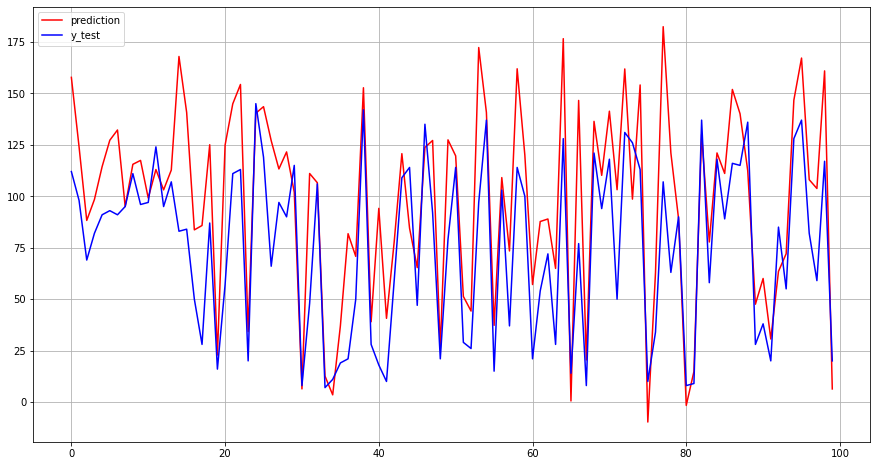

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.plot(sgdr_test_pred,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.grid()
plt.show()